Epoch 1/100
41/41 [==============================] - 2s 4ms/step - loss: 0.0235
Epoch 2/100
41/41 [==============================] - 0s 4ms/step - loss: 0.0029
Epoch 3/100
41/41 [==============================] - 0s 4ms/step - loss: 0.0017
Epoch 4/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0017
Epoch 5/100
41/41 [==============================] - 0s 4ms/step - loss: 0.0013
Epoch 6/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0013
Epoch 7/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0014
Epoch 8/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0012
Epoch 9/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0013
Epoch 10/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0011
Epoch 11/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0010
Epoch 12/100
41/41 [==============================] - 0s 3ms/step - loss: 0.0010
Epoch 13/100
41/41 [=================

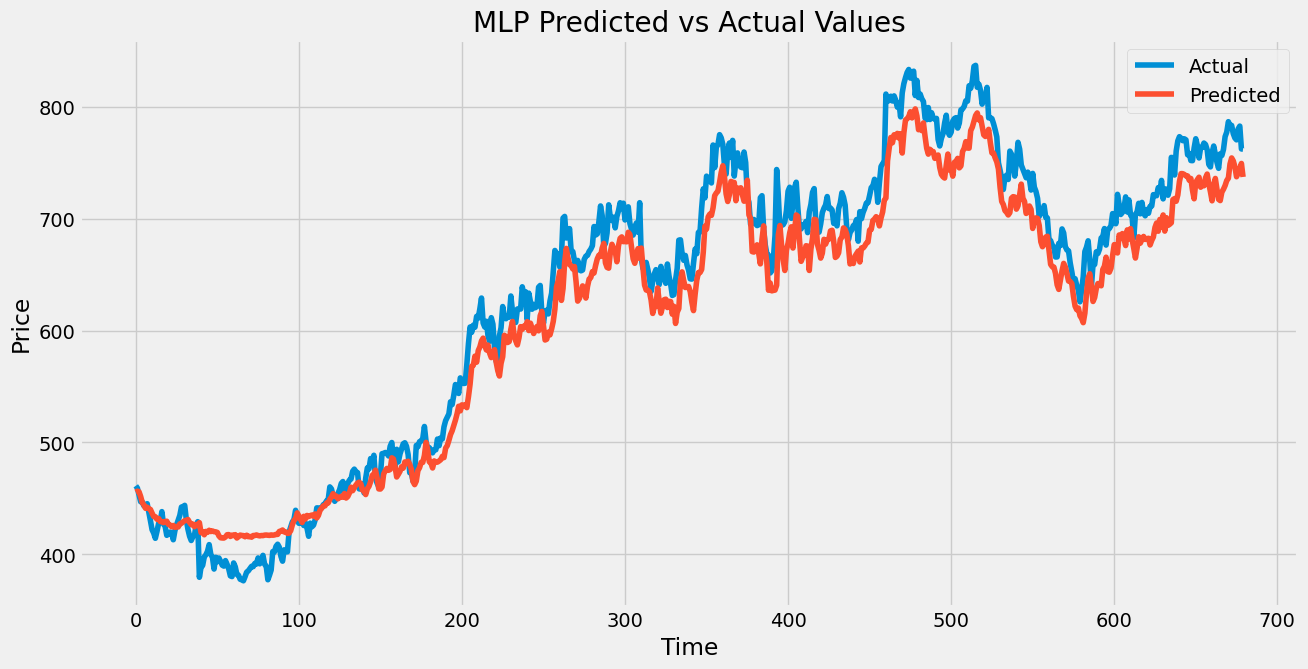

In [2]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Importing necessary libraries for stock data
from nsepy import get_history
from datetime import date

# Read the data from CSV file
df = pd.read_csv('reliance.csv')

# Create a new dataframe with only the 'Close' column
data = df.filter(['Close'])

# Converting the dataframe to a numpy array
dataset = data.values

# Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset) * .75)

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

# Create the scaled training data set
train_data = scaled_data[0:training_data_len, :]

# Split the data into x_train and y_train data sets
x_train = []
y_train = []
for i in range(30, len(train_data)):
    x_train.append(train_data[i-30:i, 0])
    y_train.append(train_data[i, 0])

# Convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Build the MLP model
model = Sequential([
    Dense(50, activation='relu', input_shape=(x_train.shape[1],)),
    Dense(50, activation='relu'),
    Dense(25, activation='relu'),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=50, epochs=100)

# Test data set
test_data = scaled_data[training_data_len - 30:, :]

# Create the x_test data set
x_test = []
for i in range(30, len(test_data)):
    x_test.append(test_data[i-30:i, 0])

# Convert x_test to a numpy array
x_test = np.array(x_test)

# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)  # Undo scaling

# Calculate RMSE
rmse = np.sqrt(np.mean(((predictions - dataset[training_data_len:, 0]) ** 2)))
print("Root Mean Squared Error:", rmse)

# Plot the predicted values against the actual values
plt.figure(figsize=(14, 7))
plt.plot(dataset[training_data_len:], label='Actual')
plt.plot(predictions, label='Predicted')
plt.title('MLP Predicted vs Actual Values')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()
